### Tối ưu hàm Rosenbrock
Đầu vào:
- Hàm Rosenbrock: $f_x = \sum_{i = 1}^{D - 1}{[100(x_{i + 1} - x_i^2)^2 + (1 - x_i)^2]}$
- Số chiều: D
- $x_i \in [lower, upper]$ với $i = [1...D]$

Đầu ra: 
- Một lời giải $x = (x_1, x_2, ..., x_D)$
- Giá trị nhỏ nhất $f_x$

In [239]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [240]:
class Problem:
    def __init__(self, D, LB, UB):
        self.D = D
        self.LB = LB
        self.UB = UB

In [241]:
def decode(position, problem: Problem):
    x = position * (problem.UB - problem.LB) + problem.LB
    x = np.clip(x, problem.LB, problem.UB)
    return x

def get_fitness(x):
    fx = np.sum(100 * (x[1:] - np.square(x[:-1]))**2 + (1 - np.square(x[:-1])))
    return fx

In [ ]:
class Individual:
    def __init__(self):
        self.position = None
        self.fitness = None 
        self.velocity = None
        self.bestFitness = None
        self.bestPosition = None
    
    def gen_indi(self, problem : Problem):
        self.velocity = np.random.uniform(0.1, 0.2, problem.D)
        self.position = np.random.uniform(0.0, 1.0, problem.D)
        self.fitness = get_fitness(decode(self.position, problem))
        self.bestFitness = self.fitness
        self.bestPosition = self.position

    def cal_fitness(self, problem : Problem):
        sol = decode(self.position, problem)
        self.fitness = get_fitness(sol)
        if self.bestFitness > self.fitness:
            self.bestFitness = self.fitness
            self.bestPosition = self.position
    
    def __repr__(self):
        result = f"position: {self.position},   fitness: {self.fitness}\n"
        result += f"bestPosition: {self.bestChromosome},   bestFitness: {self.bestFitness}"
        return result
    
    def move(self, global_best_position, w, c1, c2):
        r1 = np.random.rand()
        r2 = np.random.rand()
        self.velocity = w * self.velocity + r1 * c1 * (self.bestPosition - self.position) + r2 * c2 * (global_best_position - self.position)
        self.position += self.velocity
        self.position = np.clip(self.position, 0, 1)


In [243]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.problem = problem 
        self.list_indi = []
        self.global_best_position = None
        self.global_best_fitness = None

    def gen_pop(self):
        f_indi = Individual()
        f_indi.gen_indi(self.problem)
        self.global_best_fitness = f_indi.fitness
        self.global_best_position = f_indi.position
        self.list_indi.append(f_indi)

        for i in range(1, self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            if self.global_best_fitness > indi.fitness:
                self.global_best_fitness = indi.fitness
                self.global_best_position = indi.position
            self.list_indi.append(indi)


In [244]:
def PSO(problem: Problem, pop_size, max_gen, w, c1, c2):
    pop = Population(pop_size, problem)
    pop.gen_pop()
    history = []
    for i in range(max_gen):
        for indi in pop.list_indi:
            indi.move(pop.global_best_position, w, c1, c2)
            indi.cal_fitness(problem)
            if pop.global_best_fitness > indi.fitness:
                pop.global_best_fitness = indi.fitness
                pop.global_best_position = indi.position
        history.append(pop.list_indi[0].fitness)
    return history, pop.global_best_position

In [245]:
#setup
D = 10
LB = -50
UB = 50
problem = Problem(D, LB, UB)

pop_size = 10
max_gen = 500
w = 0.02
c1 = 0.05
c2 = 0.1

fitness_history, solution = PSO(problem, pop_size, max_gen, w, c1, c2)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}, bestfitness = {fitness_history[i]:.2f}")

Generation 0, bestfitness = 315905143.90
Generation 1, bestfitness = 264780133.05
Generation 2, bestfitness = 222594148.58
Generation 3, bestfitness = 180374278.09
Generation 4, bestfitness = 161822623.58
Generation 5, bestfitness = 148106625.85
Generation 6, bestfitness = 140293838.58
Generation 7, bestfitness = 110149528.61
Generation 8, bestfitness = 89227086.41
Generation 9, bestfitness = 64555333.86
Generation 10, bestfitness = 54711624.82
Generation 11, bestfitness = 48956857.32
Generation 12, bestfitness = 46682651.67
Generation 13, bestfitness = 45414975.64
Generation 14, bestfitness = 44437782.67
Generation 15, bestfitness = 39449095.52
Generation 16, bestfitness = 37174959.17
Generation 17, bestfitness = 37044433.92
Generation 18, bestfitness = 31573243.67
Generation 19, bestfitness = 28785888.75
Generation 20, bestfitness = 24653090.54
Generation 21, bestfitness = 20130934.44
Generation 22, bestfitness = 17651256.06
Generation 23, bestfitness = 17092776.28
Generation 24, bes

In [246]:
import pandas as pd

In [247]:
# df = pd.DataFrame(fitness_history, columns=["Values"])
# df.to_excel("output.xlsx", index=False)

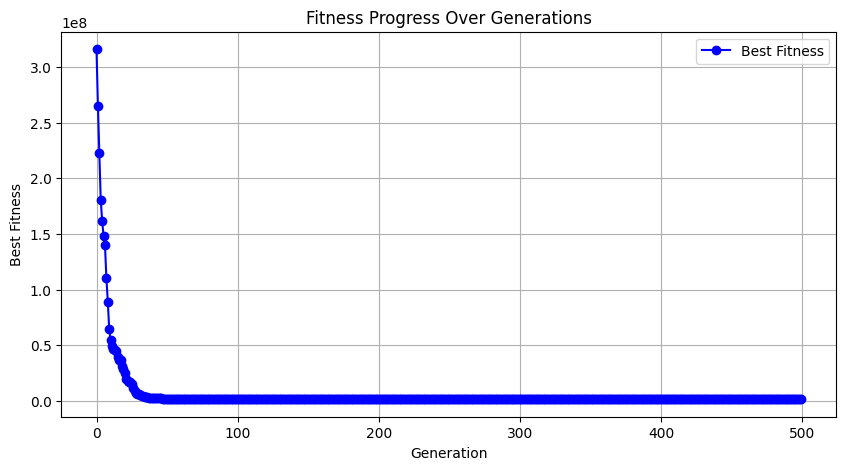

In [248]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()

In [249]:
print(decode(solution, problem))
print(get_fitness(decode(solution, problem)))

[-1.75687209  8.60371028  9.30953682 -2.41649997 -4.77553366 -5.12527917
 -2.31667796 -5.06689361  5.57446582 -0.47060503]
1536948.376026887
